# **Table of Contents:**


*   Introduction

*   Gathering

*   Assessing

*   Cleaning
*   Analyzing


*   Visualizing data


*   Conclusion



# Project: Wrangling and Analyze Data

#**Introduction** 
I will discover and apply the data wrangle to WeRateDogs data in order to be able to display and analyze it correctly and appropriately.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
#import tweepy 
import json


# 1. Data Gathering

**Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
#Read and load the csv file 
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Read and load the tsv file for images 
df_image = pd.read_csv("image-predictions.tsv", sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


2. Use the Tweepy library to query additional data via the Twitter API (tweet-json.txt)

In [4]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
     #   count += 1
       # print(str(count) + ": " + str(tweet_id))
       # try:
         #   tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
         #   json.dump(tweet._json, outfile)
          #  outfile.write('\n')
       # except tweepy.TweepError as e:
           # print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** When accessing the data, I will pay attention to the following key points:

* I only want original ratings (no retweets) that have images. While there are 5000+ tweets in the dataset, not all of them are dog ratings, and some are retweets.

* I do not need to gather the tweets beyond August 1st, 2017. While it is possible, I must note that I won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used.



In [5]:
#Read and load the Json in full file 
df_tweets=pd.read_json('tweet-json .text',lines=True)

df_tweets.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# **Assessing**

In [6]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
df.shape

(2356, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [10]:
df.notnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
1,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
2,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
3,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
4,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
2352,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
2353,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True
2354,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True


In [11]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
sum(df.duplicated())

0

In [13]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [14]:
df_image.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,1,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
837,694329668942569472,https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg,1,boxer,0.990060,True,bull_mastiff,0.007436,True,Saint_Bernard,0.001617,True
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
792,690728923253055490,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,kuvasz,0.422806,True,golden_retriever,0.291586,True,Great_Pyrenees,0.076189,True
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True


In [15]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_image.shape

(2075, 12)

In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [19]:
df_image.notnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,True,True,True,True,True,True,True,True,True,True,True,True
2071,True,True,True,True,True,True,True,True,True,True,True,True
2072,True,True,True,True,True,True,True,True,True,True,True,True
2073,True,True,True,True,True,True,True,True,True,True,True,True


In [20]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
sum(df_image.duplicated())

0

In [22]:
df_tweets.sample(50)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2065,2015-11-30 01:39:49+00:00,671141549288370177,671141549288370176,Neat pup here. Enjoys lettuce. Long af ears. S...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671141542443241472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1246,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
962,2016-07-06 01:46:38+00:00,750506206503038976,750506206503038976,This is Malcolm. He's absolutely terrified of ...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750506196939972608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4934,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2148,2015-11-26 01:07:38+00:00,669683899023405056,669683899023405056,This is Kloey. Her mother was a unicorn. 10/10...,False,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669683887996555264, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,412,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2266,2015-11-20 01:39:42+00:00,667517642048163840,667517642048163840,This is Dook &amp; Milo. Dook is struggling to...,False,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667517641523761152, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,389,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
46,2017-07-07 00:17:54+00:00,883117836046086144,883117836046086144,Please only send dogs. We don't rate mechanics...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 883117826525024257, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,37914,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
253,2017-03-22 16:04:20+00:00,844580511645339650,844580511645339648,This is Charlie. He wants to know if you have ...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 844580505345511424, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,17871,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
77,2017-06-21 19:36:23+00:00,877611172832227328,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,NaN,NaN,NaN
2329,2015-11-16 20:32:58+00:00,666353288456101888,666353288456101888,Here we have a mixed Asiago from the Galápagos...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666353280906170368, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,229,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1341,2016-03-01 20:11:59+00:00,704761120771465216,704761120771465216,This pupper killed this great white in an epic...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 704761116849774592, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7283,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2120,2015-11-28 00:48:35+00:00,670403879788544000,670403879788544000,This is Nigel. He accidentally popped his ball...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670403873723555840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,460,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [23]:
df_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [24]:
df_tweets.shape

(2354, 31)

In [25]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [26]:
df_tweets.notnull()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
1,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
2,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
3,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
4,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
2350,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
2351,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False
2352,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,False,False,False


In [27]:
df_tweets.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

# **Quality issues:**

# twitter-archive-enhanced:

* full text column was not fully displayed

* Column is hard to read source so I'll make it easy to read
* Change data type for some column from floot to integer


* Deal with a missing value in expanded_urls  column

* Fix name column  there is some name unacceptable 

* Make all name(value) in name column start with Capital letter 

* Change the data type of:timestamp ,retweeted_status_timestamp columns to datatime data type

*  Drup that columns that i don’t needed in my analysis.

*  Extract year column from timestamp column.	 





# Image-predictions:

*   Rename some columns : img_num,	p1,	p1_conf,	p1_dog,	p2,	p2_conf,	p2_dog,	p3,	p3_conf,	p3_dog.


*  Make all name(value) of prediction column start with Capital letter 




# Tweet-json:


*   Drup that columns that i don’t needed in my analysis
*   Rename some columns to Unify column names with other data-frame  






# **Tidiness:**

*   Merging  the three data-frame  into one data-frame

*  Combine the four columns: doggo،floofer،pupper،puppo columns into one column and make this column category data type and fixe an none value.


*    We must merge two columns rating_numerator،rating_denominator into one column and separate them with a (/) sign to clarify the numerator and denominator 






## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing. Before starting the cleaning process, I will make a copy of the original data to preserve the integrity of the raw dataset.

The cleaning process will involve addressing the identified quality and tidiness issues in the data. I will merge and transform individual pieces of data following the principles of tidy data. The ultimate goal is to create a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate) that is ready for further analysis and exploration.

In [28]:
#Creat a copy of dataframe for save a clean data
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweets_js_clean = df_tweets.copy()

### Issue: 
* Full text column was not fully displayed
#### Define
pd.set_option('display.max_colwidth', None) is used to define a the full text content of each column in the DataFrame, regardless of its length

In [29]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-29-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Test

In [30]:
df_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Thor. He doesn't have finals because he's a dog but is pupset you have finals. Just wants to play. 13/10 would abandon education for https://t.co/7IFn3rkJai,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/857746408056729600/photo/1,https://twitter.com/dog_rates/status/857746408056729600/photo/1,https://twitter.com/dog_rates/status/857746408056729600/photo/1",13,10,Thor,None,None,None,None
1985,672898206762672129,NaN,NaN,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672898206762672129/photo/1,11,10,Cheryl,None,None,pupper,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreg. He's riding an invisible jet ski. 11/10 that's downright legendary https://t.co/BA5AV5dx6Y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905736888321/photo/1,11,10,Kreg,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,"https://twitter.com/dog_rates/status/826958653328592898/photo/1,https://twitter.com/dog_rates/status/826958653328592898/photo/1",12,10,Loki,doggo,None,None,None
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5d…,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614150983680/photo/1,13,10,None,None,None,None,puppo
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554473250816/photo/1,11,10,Rueben,None,None,pupper,None


#### Issue:
* Column is hard to read source so I'll make it easy to read
#### Define
Replace the HTML tags with shorter and more readable names to improve the readability of the "source" column.

In [31]:
#Column is hard to read source so I'll make it easy to read 
df_clean['source'] = df_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter_for_iPhone')
df_clean['source'] = df_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter_Web_Client')
df_clean['source'] = df_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Make_a_Scen')
df_clean['source'] = df_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

# Test

In [32]:
df_clean['source'].unique()

array(['Twitter_for_iPhone', 'Twitter_Web_Client', 'Make_a_Scen',
       'TweetDeck'], dtype=object)

### Issue:
* Change data type for some column from floot to string
### Define:
Create a function `Chaning_datatype_int(name)` to convert specific columns from float to string data type. Apply this function to 'in_reply_to_status_id' and 'in_reply_to_user_id' columns in the DataFrame `df_clean`.

In [33]:
#Change data type for some column from floot to string 
#Iwill creat function for that
def Chaning_datatype_int(name): 
 df_clean[name]=df_clean[name].astype(str)

#in_reply_to_status_id
Chaning_datatype_int('in_reply_to_status_id')

#in_reply_to_user_id
Chaning_datatype_int('in_reply_to_user_id')

# Test

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue:
* Deal with a missing value in expanded_urls  column
### Define:
Drop the rows with missing values in the "expanded_urls" column from the DataFrame `df_clean`. Replace the missing values with empty strings for data consistency.

In [35]:
df_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [36]:
#So i will drop this rows with missing value in expanded_urls column
df_clean['expanded_urls'] =  df_clean['expanded_urls'] .replace(['NaN'],' ')

# Test

In [37]:
df_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

### Issue:
* Fix name column  there is some name unacceptable 
### Define:
To address this issue, the value "a" in the "name" column will be replaced with "None" to improve data accuracy and consistency in the DataFrame `df_clean`.

In [38]:
df_clean['name'].value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
           .. 
Champ      1  
Kloey      1  
Sully      1  
Batdog     1  
Mo         1  
Name: name, Length: 957, dtype: int64

In [39]:
#so i will replace the value a with None 
df_clean['name'] =  df_clean['name'] .replace(['a'],'None')

# Test

In [40]:
df_clean['name'].value_counts()

None       800
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
           .. 
Ozzie      1  
Champ      1  
Kloey      1  
Sully      1  
Mo         1  
Name: name, Length: 956, dtype: int64

### Issue:
* Make all name(value) in name column start with Capital letter
### Define:
Capitalize the names in the "name" column of the DataFrame `df_clean` to ensure uniform formatting and consistency. Apply the `str.capitalize()` method to achieve this.

In [41]:
#Make all name(value) in name column start with Capital letter

df_clean['name']= df_clean['name'].str.capitalize() 

# Test

In [42]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1851,675710890956750848,nan,nan,2015-12-12 16:16:45 +0000,Twitter_for_iPhone,This is Lenny. He was just told that he couldn't explore the fish tank. 12/10 smh all that work for nothing https://t.co/JWi6YrpiO1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675710890956750848/photo/1,https://twitter.com/dog_rates/status/675710890956750848/photo/1",12,10,Lenny,None,None,None,None
1519,690735892932222976,nan,nan,2016-01-23 03:20:44 +0000,Twitter_for_iPhone,Say hello to Peaches. She's a Dingleberry Zanderfloof. 13/10 would caress lots https://t.co/YrhkrTsoTt,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/690735892932222976/photo/1,https://twitter.com/dog_rates/status/690735892932222976/photo/1",13,10,Peaches,None,None,None,None
1532,690005060500217858,nan,nan,2016-01-21 02:56:40 +0000,Twitter_for_iPhone,"""I'm the only one that ever does anything in this household"" 10/10 https://t.co/V8HcVIh4jt",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690005060500217858/photo/1,10,10,None,None,None,None,None
1236,712438159032893441,nan,nan,2016-03-23 00:37:48 +0000,Twitter_for_iPhone,This is Kane. He's a semi-submerged Haitian Huffleplop. Happy af. Sick waterfall. 11/10 would pat head approvingly https://t.co/7zjEC501Ul,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712438159032893441/photo/1,11,10,Kane,None,None,None,None
1135,728409960103686147,nan,nan,2016-05-06 02:24:02 +0000,Twitter_for_iPhone,This is Wallace. He's a skater pup. He said see ya later pup. Can easily do a kick flip. Gnarly af. 10/10 v petable https://t.co/5i8fORVKgr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960103686147/photo/1,10,10,Wallace,None,None,None,None


### Issue: 
* Change the data type of:timestamp ,retweeted_status_timestamp columns to datatime data typee
### Define:
Convert the data types of the "timestamp" and "retweeted_status_timestamp" columns in the DataFrame `df_clean` to datetime using the `pd.to_datetime()` method.

In [43]:
#Change the data type to datatime data type

#I'll Create at function  to convert any data type to Integer type
def Chaning_datatype(new_name): 
  df_clean[new_name]=pd.to_datetime(df_clean[new_name])

#timestamp
Chaning_datatype('timestamp')

#retweeted_status_timestamp
Chaning_datatype('retweeted_status_timestamp')


# Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue :
* Drop that columns that i don’t needed in my analysis.
### Define:
Drop rows where "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" columns are not null from the DataFrame `df_clean`. Then, use the `drop()` method to remove the columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" from the DataFrame as they are not needed for the analysis.

In [45]:
#Drup the values or row before we remove a column of retweeted
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [46]:
df_clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id"
,"retweeted_status_timestamp"],axis=1,inplace=True)

# Test

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### issue:
* Extract year column from timestamp column.
### Define:
Extract the year from the "timestamp" column using `pd.DatetimeIndex()` and create a new column named "year" in the DataFrame `df_clean` to store this information.

In [48]:
# I will extract the year from timestamp  column

df_clean['year'] = pd.DatetimeIndex(df_clean['timestamp']).year


# Test

In [49]:
df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter_for_iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter_for_iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter_for_iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter_for_iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter_for_iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,2017





---



### Issue:
* Rename some columns : img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog.
### Define:
Rename some columns in the DataFrame `df_image_clean` for clarity and better understanding:
- "img_num" to "image_number"
- "p1" to "prediction_1"
- "p1_conf" to "p1_confident"
- "p1_dog" to "p1_dog"
- "p2" to "prediction_2"
- "p2_conf" to "p2_confident"
- "p2_dog" to "p2_dog"
- "p3" to "prediction_3"
- "p3_conf" to "p3_confident"
- "p3_dog" to "p3_dog"

In [50]:
#I wil rename some name of column to clear name
  
df_image_clean.rename(columns = {'p1':'prediction_1','p2':'prediction_2','p3':'prediction_3'
                                 ,'p1_conf':'p1_confident','p2_conf':'p2_confident','p3_conf':'p3_confident'
                                 ,'img_num':'image_number'}, inplace = True) 

# Test

In [51]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   image_number  2075 non-null   int64  
 3   prediction_1  2075 non-null   object 
 4   p1_confident  2075 non-null   float64
 5   p1_dog        2075 non-null   bool   
 6   prediction_2  2075 non-null   object 
 7   p2_confident  2075 non-null   float64
 8   p2_dog        2075 non-null   bool   
 9   prediction_3  2075 non-null   object 
 10  p3_confident  2075 non-null   float64
 11  p3_dog        2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue:
* The names in the "prediction" columns need to start with a capital letter for consistency and better presentation.
### Define:
Capitalize the first letter of the names (values) in the "prediction_1", "prediction_2", and "prediction_3" columns of the DataFrame `df_image_clean`. This will enhance consistency and readability of the data.

In [52]:
#Make all name(value) of prediction column start with Capital letter 
def Capital_first_letter(new_name): 
  df_image_clean[new_name] = df_image_clean[new_name].str.capitalize() 

#prediction_1
Capital_first_letter('prediction_1')

#prediction_2
Capital_first_letter('prediction_2')

#prediction_3
Capital_first_letter('prediction_3')


# Test

In [53]:
df_image_clean.sample(10)

,tweet_id,jpg_url,image_number,prediction_1,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,Llama,0.284394,False,Standard_poodle,0.132569,True,Teddy,0.127975,False
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_bay_retriever,0.246488,True,Kelpie,0.006892,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_bay_retriever,0.193575,True,Rottweiler,0.001193,True
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,Seat_belt,0.779137,False,Toy_poodle,0.036927,True,Golden_retriever,0.016972,True
774,689623661272240129,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,Toy_poodle,0.279604,True,Mashed_potato,0.208564,False,Labrador_retriever,0.077481,True
269,670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,American_staffordshire_terrier,0.919714,True,Staffordshire_bullterrier,0.073430,True,Bull_mastiff,0.000906,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,Indri,0.123584,False,Malamute,0.080379,True
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,Wombat,0.880257,False,Corn,0.019421,False,Pug,0.019044,True




---



### Issue:
There are several columns in the DataFrame `df_tweets_js_clean` that are not needed for the analysis.

### Define:
Remove the unnecessary columns from the DataFrame `df_tweets_js_clean` to simplify the dataset and focus on the relevant information for the analysis.

In [54]:
df_tweets_js_clean.drop(columns=['created_at','id_str','extended_entities','truncated','display_text_range'
                                       ,'entities','source','in_reply_to_status_id','in_reply_to_status_id_str'
                                       ,'in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates'
                                       ,'place','contributors','is_quote_status','possibly_sensitive','possibly_sensitive_appealable','lang'
                                       ,'retweeted_status','quoted_status_id' ,'quoted_status_id_str','quoted_status','favorited','retweeted'],axis=1,inplace=True)  

# Test

In [55]:
df_tweets_js_clean.head()

,id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964,42908
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774,41048


### Issue:
Column names in the DataFrame `df_tweets_js_clean` are not unified with other DataFrames, causing potential difficulties during data merging.

### Define:
To address this issue, rename the column 'id' to 'tweet_id' in the DataFrame `df_tweets_js_clean` to unify column names and facilitate data merging with other DataFrames.

In [56]:
#I well  Rename some columns to Unify column names with other data-frame 
# so when i do marge for three column that make it easy if the names of column are Unify with other 
df_tweets_js_clean.rename(columns = {'id':'tweet_id'}, inplace = True) 

# Test

In [57]:
df_tweets_js_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   full_text       2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


# Tidiness

### Issue:
The three dataframes `df_clean`, `df_tweets_js_clean`, and `df_image_clean` need to be combined into a single dataframe to facilitate data analysis and exploration.

### Define:
To address this tidiness issue, merge the three dataframes `df_clean`, `df_tweets_js_clean`, and `df_image_clean` on the common column 'tweet_id' to create a single dataframe `df_wrangle` that contains all relevant information for the analysis.

In [58]:
# So now i will Merging the three data-frame into one data-frame 

#First marge between df_clean & df_tweets_js_clean marge on tweet_id
F_df=df_clean
S_df=df_tweets_js_clean
Original_df= pd.merge(left=F_df,right=S_df, left_on='tweet_id', right_on='tweet_id', how='inner')

# Second , i wil marging betweenn Original_df & df_image_clean marge on tweet_id
T_df=df_image_clean
df_wrangle= pd.merge(left=Original_df,right=T_df, left_on='tweet_id', right_on='tweet_id', how='inner')

# Test

In [59]:
df_wrangle

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,image_number,prediction_1,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter_for_iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter_for_iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter_for_iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter_for_iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter_for_iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Twitter_for_iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,...,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1990,666044226329800704,2015-11-16 00:04:52+00:00,Twitter_for_iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,None,None,None,...,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
1991,666033412701032449,2015-11-15 23:21:54+00:00,Twitter_for_iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,None,None,None,...,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
1992,666029285002620928,2015-11-15 23:05:30+00:00,Twitter_for_iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,None,None,None,...,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Tidiness

---

### Issue:
Combine the four columns 'doggo', 'floofer', 'pupper', and 'puppo' into a single column named 'dog_type', of category data type, while handling missing values and ensuring consistent labels.

### Define:
To improve data tidiness, we will combine the four columns 'doggo', 'floofer', 'pupper', and 'puppo' into a single column named 'dog_type'. We will handle missing values by replacing 'None' with an empty string. After combining the values, we will convert the 'dog_type' column to a category data type to enhance memory efficiency. We will also address inconsistent labels such as 'doggopuppo', 'doggofloofer', and 'doggopupper' by replacing them with 'doggo/puppo', 'doggo/floofer', and 'doggo/pupper', respectively.

In [60]:
#Combine the four columns: doggo،floofer،pupper،puppo columns into one column and make this column category data type.
# FIRST I WILL REPLACE NONE VALUE TO empty STRING
def Replace_None (column):
 df_wrangle[column] = df_wrangle[column].replace(['None'],'')

#Replace_None for doggo column
Replace_None(['doggo'])
#Replace_None for floofer column
Replace_None(['floofer'])
#Replace_None for pupper column
Replace_None(['pupper'])
#Replace_None for puppo column
Replace_None(['puppo'])

#marge the value into one column
df_wrangle["dog_type"] = df_wrangle["doggo"] + df_wrangle["floofer"] + df_wrangle["pupper"]+df_wrangle["puppo"]

#make this column category data type
df_wrangle["dog_type"]=df_wrangle["dog_type"].astype('category')

#Dropp doggo &floofer & pupper & puppo column 
df_wrangle.drop(columns=["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

In [61]:
df_wrangle['dog_type'].unique()

['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo', 'doggofloofer', 'doggopupper']
Categories (8, object): ['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo', 'doggofloofer', 'doggopupper']

In [62]:
#split 
df_wrangle['dog_type']=df_wrangle['dog_type'].str.replace('doggopuppo','doggo/puppo')

df_wrangle['dog_type']=df_wrangle['dog_type'].str.replace('doggofloofer','doggo/floofer')

df_wrangle['dog_type']=df_wrangle['dog_type'].str.replace('doggopupper','doggo/pupper')


#Test

In [63]:
df_wrangle['dog_type'].unique()


array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [64]:
df_wrangle.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,full_text,...,prediction_1,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog,dog_type
799,740676976021798912,2016-06-08 22:48:46+00:00,Twitter_for_iPhone,"Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper https://t.co/sMbMw5Z2XC",https://twitter.com/dog_rates/status/740676976021798912/photo/1,11,10,Baloo,2016,"Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper https://t.co/sMbMw5Z2XC",...,Wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False,pupper
1981,666073100786774016,2015-11-16 01:59:36+00:00,Twitter_for_iPhone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,2015,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,...,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,
1319,683462770029932544,2016-01-03 01:39:57+00:00,Twitter_for_iPhone,"""Hello forest pupper I am house pupper welcome to my abode"" (8/10 for both) https://t.co/qFD8217fUT",https://twitter.com/dog_rates/status/683462770029932544/photo/1,8,10,None,2016,"""Hello forest pupper I am house pupper welcome to my abode"" (8/10 for both) https://t.co/qFD8217fUT",...,Italian_greyhound,0.399560,True,Whippet,0.267153,True,German_short-haired_pointer,0.081319,True,pupper
1235,688828561667567616,2016-01-17 21:01:41+00:00,Twitter_for_iPhone,Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,https://twitter.com/dog_rates/status/688828561667567616/photo/1,9,10,Brad,2016,Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,...,Cardigan,0.614231,True,Skunk,0.139392,False,Toilet_tissue,0.031158,False,
1866,668286279830867968,2015-11-22 04:33:59+00:00,Twitter_for_iPhone,Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10 https://t.co/C8U6cxI1Jc,https://twitter.com/dog_rates/status/668286279830867968/photo/1,11,10,Rusty,2015,Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10 https://t.co/C8U6cxI1Jc,...,Golden_retriever,0.215944,True,Basset,0.189214,True,Cardigan,0.113010,True,


#Tidiness

---

### Issue:
Merge the 'rating_numerator' and 'rating_denominator' columns into a single column named 'rating' separated by a (/) sign to clarify the numerator and denominator. Convert the data type of 'rating_numerator' and 'rating_denominator' to strings before merging.

### Define:
Merge 'rating_numerator' and 'rating_denominator' into 'rating' column with a (/) sign. Convert data types to strings. Drop original columns.

In [65]:
#first we will convert data type of rating_numerator،rating_denominator to str
df_wrangle['rating_numerator'] = df_wrangle['rating_numerator'].apply(str)
df_wrangle['rating_denominator'] = df_wrangle['rating_denominator'].apply(str)

# Now we wil merge two columns rating_numerator،rating_denominator into one column and separate them with a (/) sign to clarify the numerator and denominator
df_wrangle["rating"] = df_wrangle["rating_numerator"] +'/'+ df_wrangle["rating_denominator"]


#Dropp rating_numerator &rating_denominator column 
df_wrangle.drop(columns=["rating_numerator","rating_denominator"],axis=1,inplace=True)


#Test

In [66]:
df_wrangle.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,year,full_text,retweet_count,favorite_count,...,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog,dog_type,rating
1980,666082916733198337,2015-11-16 02:38:37+00:00,Twitter_for_iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,None,2015,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,47,121,...,0.489814,True,Bull_mastiff,0.404722,True,French_bulldog,0.048960,True,,6/10
1457,676949632774234114,2015-12-16 02:19:04+00:00,Twitter_for_iPhone,This is Tyrus. He's a Speckled Centennial Ticonderoga. Terrified of floating red ball. Nifty bandana. 8/10 v petable https://t.co/HqM3YhCaaa,https://twitter.com/dog_rates/status/676949632774234114/photo/1,Tyrus,2015,This is Tyrus. He's a Speckled Centennial Ticonderoga. Terrified of floating red ball. Nifty bandana. 8/10 v petable https://t.co/HqM3YhCaaa,448,1413,...,0.206479,True,Saint_bernard,0.139339,True,Boxer,0.114606,True,,8/10
722,750041628174217216,2016-07-04 19:00:33+00:00,TweetDeck,This is Beau. He's trying to keep his daddy from packing to leave for Annual Training. 13/10 and now I'm crying https://t.co/7JeDfQvzzI,https://twitter.com/dog_rates/status/750041628174217216/photo/1,Beau,2016,This is Beau. He's trying to keep his daddy from packing to leave for Annual Training. 13/10 and now I'm crying https://t.co/7JeDfQvzzI,703,3502,...,0.252031,True,Maltese_dog,0.188090,True,Golden_retriever,0.133017,True,,13/10
39,883482846933004288,2017-07-08 00:28:19+00:00,Twitter_for_iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",Bella,2017,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10407,46860,...,0.943082,True,Labrador_retriever,0.032409,True,Kuvasz,0.005501,True,,5/10
801,740365076218183684,2016-06-08 02:09:24+00:00,Twitter_for_iPhone,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,https://twitter.com/dog_rates/status/740365076218183684/photo/1,None,2016,When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85,495,2727,...,0.246313,False,Windsor_tie,0.172446,False,Mushroom,0.137516,False,,10/10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
#Store the clean DataFrame in a CSV file
df_wrangle.to_csv('twitter_archive_master.csv',index=False, encoding ='utf-8')

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data.

In [68]:
df_wrangle.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,year,full_text,retweet_count,favorite_count,...,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog,dog_type,rating
1281,685532292383666176,2016-01-08 18:43:29+00:00,Twitter_for_iPhone,"For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",https://twitter.com/dog_rates/status/685532292383666176/photo/1,None,2016,"For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",1298,3336,...,0.318524,False,Dingo,0.215436,False,Collie,0.095805,True,,9/10
1701,671355857343524864,2015-11-30 15:51:24+00:00,Twitter_for_iPhone,This is Lou. He's a Petrarch Sunni Pinto. Well-behaved pup. Little legs just hang there. 10/10 would pet firmly https://t.co/FoCULrC3rD,https://twitter.com/dog_rates/status/671355857343524864/photo/1,Lou,2015,This is Lou. He's a Petrarch Sunni Pinto. Well-behaved pup. Little legs just hang there. 10/10 would pet firmly https://t.co/FoCULrC3rD,119,508,...,0.313811,True,Toy_poodle,0.165585,True,Irish_terrier,0.056094,True,,10/10
1396,679729593985699840,2015-12-23 18:25:38+00:00,Twitter_for_iPhone,This is Hunter. He was playing with his ball minding his own business. Has no idea what happened to the carpet. 8/10 https://t.co/DbUTDI3u1R,https://twitter.com/dog_rates/status/679729593985699840/photo/1,Hunter,2015,This is Hunter. He was playing with his ball minding his own business. Has no idea what happened to the carpet. 8/10 https://t.co/DbUTDI3u1R,937,2367,...,0.164215,False,West_highland_white_terrier,0.093515,True,Ashcan,0.067278,False,,8/10
1963,666418789513326592,2015-11-17 00:53:15+00:00,Twitter_for_iPhone,This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,https://twitter.com/dog_rates/status/666418789513326592/photo/1,Walter,2015,This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,48,129,...,0.149680,True,Papillon,0.148258,True,Chihuahua,0.142860,True,,10/10
1538,674781762103414784,2015-12-10 02:44:43+00:00,Twitter_for_iPhone,Bedazzled pup here. Fashionable af. Super yellow. Looks hella fluffy. Webbed paws for efficient fetching. 8/10 https://t.co/ot8yMUGodj,https://twitter.com/dog_rates/status/674781762103414784/photo/1,None,2015,Bedazzled pup here. Fashionable af. Super yellow. Looks hella fluffy. Webbed paws for efficient fetching. 8/10 https://t.co/ot8yMUGodj,1335,2169,...,0.148975,False,Hamster,0.068985,False,Wool,0.031728,False,,8/10
1894,667793409583771648,2015-11-20 19:55:30+00:00,Twitter_for_iPhone,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,https://twitter.com/dog_rates/status/667793409583771648/photo/1,None,2015,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,358,736,...,0.535073,True,English_setter,0.451219,True,Great_dane,0.008164,True,,8/10
78,874012996292530176,2017-06-11 21:18:31+00:00,Twitter_for_iPhone,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V","https://twitter.com/dog_rates/status/874012996292530176/photo/1,https://twitter.com/dog_rates/status/874012996292530176/photo/1",Sebastian,2017,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",11007,35501,...,0.806674,True,Pembroke,0.116622,True,Kelpie,0.049182,True,puppo,13/10
202,842535590457499648,2017-03-17 00:38:32+00:00,Twitter_for_iPhone,This is Winnie. She lost her body saving a children's hospital from an avalanche. 13/10 what a h*ckin hero https://t.co/Tf0r

In [69]:
df_wrangle.describe()

,tweet_id,year,retweet_count,favorite_count,image_number,p1_confident,p2_confident,p3_confident
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,2015.846540,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,0.698734,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,2015.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,2015.000000,624.750000,1982.000000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.084748e+17,2016.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,2016.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,2017.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## Show who that have a max number of retweets & According to  dog_type retweets

In [70]:
#Show who that have a max number of retweets 
max_number_of_retweets=df_wrangle.query('retweet_count==retweet_count.max()')
max_number_of_retweets.head()

,tweet_id,timestamp,source,text,expanded_urls,name,year,full_text,retweet_count,favorite_count,...,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog,dog_type,rating
775,744234799360020481,2016-06-18 18:26:18+00:00,Twitter_for_iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,None,2016,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,79515,131075,...,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,doggo,13/10


In [71]:
#Show who that have a max number of retweets According  dog_type
df_wrangle.groupby(['dog_type'], as_index=False)['retweet_count'].max()

,dog_type,retweet_count
0,,56625
1,doggo,79515
2,doggo/floofer,3433
3,doggo/pupper,17621
4,doggo/puppo,19196
5,floofer,18497
6,pupper,32883
7,puppo,48265


#Show who that have a min number of retweets & According to  dog_type

In [72]:
#Show who that have a min number of retweets 
min_number_of_retweets=df_wrangle.query('retweet_count==retweet_count.min()')
min_number_of_retweets.head()

,tweet_id,timestamp,source,text,expanded_urls,name,year,full_text,retweet_count,favorite_count,...,p1_confident,p1_dog,prediction_2,p2_confident,p2_dog,prediction_3,p3_confident,p3_dog,dog_type,rating
1977,666102155909144576,2015-11-16 03:55:04+00:00,Twitter_for_iPhone,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,https://twitter.com/dog_rates/status/666102155909144576/photo/1,None,2015,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,16,81,...,0.298617,True,Newfoundland,0.149842,True,Borzoi,0.133649,True,,11/10


In [73]:
#Show who that have a min number of retweets According dog_type
df_wrangle.groupby(['dog_type'], as_index=False)['retweet_count'].min()

,dog_type,retweet_count
0,,16
1,doggo,725
2,doggo/floofer,3433
3,doggo/pupper,1265
4,doggo/puppo,19196
5,floofer,496
6,pupper,103
7,puppo,716


# Find out who have the maximum number of photos and what type of dog it is

In [74]:
max_number_of_image=df_wrangle.query('image_number==image_number.max()')
max_number_of_image.groupby(['tweet_id'], as_index=False)['image_number'].max()

,tweet_id,image_number
0,668623201287675904,4
1,689905486972461056,4
2,710588934686908417,4
3,734787690684657664,4
4,750868782890057730,4
5,756998049151549440,4
6,758405701903519748,4
7,758854675097526272,4
8,762464539388485633,4
9,773985732834758656,4


In [75]:
df_wrangle.groupby(['dog_type'], as_index=False)['image_number'].max()

,dog_type,image_number
0,,4
1,doggo,4
2,doggo/floofer,1
3,doggo/pupper,2
4,doggo/puppo,1
5,floofer,2
6,pupper,4
7,puppo,3


#What is the most common type of dog?

In [76]:
df_wrangle.dog_type.value_counts()

                 1688
pupper           203 
doggo            63  
puppo            22  
doggo/pupper     9   
floofer          7   
doggo/floofer    1   
doggo/puppo      1   
Name: dog_type, dtype: int64

#In which year get the most tweets?

Text(0, 0.5, 'Tweets')

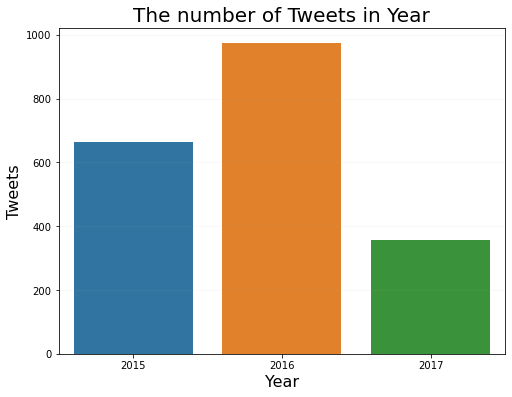

In [77]:
import seaborn as sb
plt.figure(figsize = [8, 6])

sb.countplot( x='year' , data=df_wrangle);
plt.grid(axis='y', alpha=0.10)

plt.title("The number of Tweets in Year", fontsize=20)
plt.xlabel('Year' ,fontsize=16 ); 
plt.ylabel('Tweets',fontsize=16)



# Sources 

*   https://www.kite.com/python/answers/how-load-a-.tsv-file-into-pandas-dataframe

*   https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

*  https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/

*   https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe

*   https://www.geeksforgeeks.org/capitalize-first-letter-of-a-column-in-pandas-dataframe/
*  https://datatofish.com


*  https://seaborn.pydata.org/


*   https://stackoverflow.com/

